In [1]:
import glob
import json
import pandas as pd
import os
import tqdm

In [2]:
# 주간 label data 경로 갖고오기
day_label_dir = "day label path"
day_json = glob.glob( day_label_dir + '/*/*')
# 주간 img data 경로 갖고오기
day_img_dir = "day img path"
day_img = glob.glob( day_img_dir + '/*/*/*/*.jpg')

# 야간 label data 경로 갖고오기
ni_label_dir = "night label path"
ni_json = glob.glob( ni_label_dir + '/*/*/*/*')
# 야간 img data 경로 갖고오기
ni_img_dir = "night img path"
ni_img = glob.glob( ni_img_dir + '/*/*/*/*.jpg')

In [ ]:
# 경로가 잘 불러와졌는지 확인
print(day_json[0])
print(ni_json[0])

print(day_img[0])
print(ni_img[0])

In [ ]:
# 폴더 경로 컬럼을 만들기 위한 연습
all_img02 = day_img
tmp02 = all_img02[0]

tmp03 = tmp02.split("\\")
tmp03[0] + "/" + tmp03[1] + "/" + tmp03[2] + "/" + tmp03[3]

In [8]:
# 주간 라벨링갯수 확인
motor = []
bike = []
scooter =[]
for i in range(len(day_json)):
    with open(day_json[i], encoding='UTF-8') as a:
        dict01 = json.load(a)

        json_list = dict01.get('row')
        for list in json_list :

            if '이륜차' in list.get("attributes1"):
                if '오토바이' in list.get("attributes2"):
                    motor.append(a.name)
                elif '자전거' in list.get("attributes2"):
                    bike.append(a.name)
                elif '전동이동체' in list.get("attributes2"):
                    scooter.append(a.name)

print(len(motor), len(bike), len(scooter))

3202 1228 1481


In [9]:
# 야간 라벨링 갯수 확인
motor = []
bike = []
scooter =[]
for i in range(len(ni_json)):
    with open(ni_json[i], encoding='UTF-8') as a:
        dict01 = json.load(a)

        json_list = dict01.get('row')
        for list in json_list :

            if '이륜차' in list.get("attributes1"):
                if '오토바이' in list.get("attributes2"):
                    motor.append(a.name)
                elif '자전거' in list.get("attributes2"):
                    bike.append(a.name)
                elif '전동이동체' in list.get("attributes2"):
                    scooter.append(a.name)

print(len(motor), len(bike), len(scooter))

1893 692 1186


In [4]:
# yolo 모델을 위한 bounding box 변환 함수
def pascal_voc_to_yolo(x1, y1, x2, y2, image_w, image_h):
    return [((x2 + x1)/(2*image_w)), ((y2 + y1)/(2*image_h)), (x2 - x1)/image_w, (y2 - y1)/image_h]


In [7]:
# 경로 및 yolo를 위한 좌표 - 주간

datas= [] # 데이터 프레임을 만들기 위한 리스트
for i in range(len(day_json)):
    # json 파일 읽기
    with open(day_json[i], encoding='UTF-8') as a:
        
        dict01 = json.load(a)
        # 필요한 데이터는 json 파일 안 row에 존재
        json_list = dict01.get('row')
        for list in json_list :
            # 이륜차인 것들만 추출
            if '이륜차' in list.get("attributes1"):
                # 오토바이
                if '오토바이' == list.get("attributes2"):
                    #라벨링 0으로 결정
                    attribute = 0
                    # x1(= xmin) , y1(= ymin), x2(=xmax), y2(= ymax), wid(이미지 파일의 너비), hei( 이미지 파일의 높이)
                    x1, y1 = int(list.get('points1').split(',')[0]), int(list.get('points1').split(',')[1])
                    x2, y2 = int(list.get('points3').split(',')[0]), int(list.get('points3').split(',')[1])
                    wid = list.get('width')
                    hei = list.get('height')
                    # yolo 모델에 맞도록 이미지 라벨링 x 중앙값, y 중앙값, 이미지 파일 너비, 이미지파일의 높이 모두를 정규화한 값
                    cx, cy, img_w, img_h = pascal_voc_to_yolo(x1, y1, x2, y2, wid, hei)
                    # 파일 경로
                    json_path = a.name
                    img_path = day_img[i]
                    tmp = img_path.split("\\")
                    tmp02 = img_path.split("\\")
                    folder_path = tmp02[0] + "/" + tmp02[1] + "/" + tmp02[2] + "/" + tmp02[3]
                    # 파일 이름
                    img_name = tmp[-1]
                    # 리스트에 추가
                    datas.append({
                        "label" : attribute,
                        "img_name" : img_name,
                        "cx" : cx,
                        "cy" : cy,
                        "img_w" : img_w,
                        "img_h" : img_h,
                        "json_path" : json_path,
                        "img_path" : img_path,
                        "folder_path" :folder_path
                        
                    })
                    
                elif '자전거' == list.get("attributes2"):
                    # 라벨링 1로 결정
                    attribute = 1
                    x1, y1 = int(list.get('points1').split(',')[0]), int(list.get('points1').split(',')[1])
                    x2, y2 = int(list.get('points3').split(',')[0]), int(list.get('points3').split(',')[1])
                    wid = list.get('width')
                    hei = list.get('height')
                    cx, cy, img_w, img_h = pascal_voc_to_yolo(x1, y1, x2, y2, wid, hei)

                    json_path = a.name
                    img_path = day_img[i]
                    tmp = img_path.split("\\")
                    tmp02 = img_path.split("\\")
                    folder_path = tmp02[0] + "/" + tmp02[1] + "/" + tmp02[2] + "/" + tmp02[3]
                    img_name = tmp[-1]
                    
                    datas.append({
                        "label" : attribute,
                        "img_name" : img_name,
                        "cx" : cx,
                        "cy" : cy,
                        "img_w" : img_w,
                        "img_h" : img_h,
                        "json_path" : json_path,
                        "img_path" : img_path,
                        "folder_path" :folder_path
                        
                    })
                    
                elif '전동이동체' == list.get("attributes2"):
                    # 전동이동체는 전동휠체어, 전동킥보드 기타 등등을 포함함
                    # 라벨링 2로 결정
                    attribute = 2
                    x1, y1 = int(list.get('points1').split(',')[0]), int(list.get('points1').split(',')[1])
                    x2, y2 = int(list.get('points3').split(',')[0]), int(list.get('points3').split(',')[1])
                    wid = list.get('width')
                    hei = list.get('height')
                    cx, cy, img_w, img_h = pascal_voc_to_yolo(x1, y1, x2, y2, wid, hei)

                    json_path = a.name
                    img_path = day_img[i]
                    tmp = img_path.split("\\")
                    tmp02 = img_path.split("\\")                    
                    folder_path =  tmp02[0] + "/" + tmp02[1] + "/" + tmp02[2] + "/" + tmp02[3]
                    img_name = tmp[-1]
                    
                    datas.append({
                        "label" : attribute,
                        "img_name" : img_name,
                        "cx" : cx,
                        "cy" : cy,
                        "img_w" : img_w,
                        "img_h" : img_h,
                        "json_path" : json_path,
                        "img_path" : img_path,
                        "folder_path" :folder_path
                        
                    })
                    

In [9]:
df_all = pd.DataFrame(datas)
df_all.head(10)

label       img_name        cx        cy     img_w     img_h  \
0      1  day_00032.jpg  0.791927  0.568981  0.030729  0.043519   
1      1  day_00033.jpg  0.800000  0.568981  0.032292  0.045370   
2      1  day_00034.jpg  0.813802  0.568981  0.033854  0.047222   
3      1  day_00035.jpg  0.845313  0.569907  0.035417  0.049074   
4      0  day_00035.jpg  0.926562  0.799074  0.146875  0.401852   
5      0  day_00036.jpg  0.865365  0.759722  0.269271  0.473148   
6      1  day_00037.jpg  0.886979  0.571759  0.040625  0.054630   
7      0  day_00037.jpg  0.718490  0.708333  0.180729  0.353704   
8      1  day_00038.jpg  0.905208  0.569907  0.042708  0.062037   
9      0  day_00038.jpg  0.650781  0.678241  0.131771  0.286111   

                                           json_path  \
0  J:/zero_base_school/final/자율주행 및 ADAS 인공지능 학습용...   
1  J:/zero_base_school/final/자율주행 및 ADAS 인공지능 학습용...   
2  J:/zero_base_school/final/자율주행 및 ADAS 인공지능 학습용...   
3  J:/zero_base_school/final/자율주행 및 ADAS 인공지능 학습용...   
4  J:/zero_base_school/final/자율주행 및 ADAS 인공지능 학습용...   
5  J:/zero_base_school/final/자율주행 및 ADAS 인공지능 학습용...   
6  J:/zero_base_school/final/자율주행 및 ADAS 인공지능 학습용...   
7  J:/zero_base_school/final/자율주행 및 ADAS 인공지능 학습용...   
8  J:/zero_base_school/final/자율주행 및 ADAS 인공지능 학습용...   
9  J:/zero_base_school/final/자율주행 및 ADAS 인공지능 학습용...   

                                            img_path  \
0  J:/zero_base_school/final/자율주행 및 ADAS 인공지능 학습용...   
1  J:/zero_base_school/final/자율주행 및 ADAS 인공지능 학습용...   
2  J:/zero_base_school/final/자율주행 및 ADAS 인공지능 학습용...   
3  J:/zero_base_school/final/자율주행 및 ADAS 인공지능 학습용...   
4  J:/zero_base_school/final/자율주행 및 ADAS 인공지능 학습용...   
5  J:/zero_base_school/final/자율주행 및 ADAS 인공지능 학습용...   
6  J:/zero_base_school/final/자율주행 및 ADAS 인공지능 학습용...   
7  J:/zero_base_school/final/자율주행 및 ADAS 인공지능 학습용...   
8  J:/zero_base_school/final/자율주행 및 ADAS 인공지능 학습용...   
9  J:/zero_base_school/final/자율주행 및 ADAS 인공지능 학습용...   

                                         folder_path  
0  J:/zero_base_school/final/자율주행 및 ADAS 인공지능 학습용...  
1  J:/zero_base_school/final/자율주행 및 ADAS 인공지능 학습용...  
2  J:/zero_base_school/final/자율주행 및 ADAS 인공지능 학습용...  
3  J:/zero_base_school/final/자율주행 및 ADAS 인공지능 학습용...  
4  J:/zero_base_school/final/자율주행 및 ADAS 인공지능 학습용...  
5  J:/zero_base_school/final/자율주행 및 ADAS 인공지능 학습용...  
6  J:/zero_base_school/final/자율주행 및 ADAS 인공지능 학습용...  
7  J:/zero_base_school/final/자율주행 및 ADAS 인공지능 학습용...  
8  J:/zero_base_school/final/자율주행 및 ADAS 인공지능 학습용...  
9  J:/zero_base_school/final/자율주행 및 ADAS 인공지능 학습용...

In [10]:
# data frame 저장
df_all.to_csv('day_data.csv')

In [15]:
# 경로 및 yolo를 위한 좌표 - 야간

datas= [] # 데이터 프레임을 만들기 위한 리스트
for i in range(len(ni_json)):
    # json 파일 읽기
    with open(ni_json[i], encoding='UTF-8') as a:
        
        dict01 = json.load(a)
        # 필요한 데이터는 json 파일 안 row에 존재
        json_list = dict01.get('row')
        for list in json_list :
            # 이륜차인 것들만 추출
            if '이륜차' in list.get("attributes1"):
                # 오토바이
                if '오토바이' == list.get("attributes2"):
                    #라벨링 0으로 결정
                    attribute = 0
                    # x1(= xmin) , y1(= ymin), x2(=xmax), y2(= ymax), wid(이미지 파일의 너비), hei( 이미지 파일의 높이)
                    x1, y1 = int(list.get('points1').split(',')[0]), int(list.get('points1').split(',')[1])
                    x2, y2 = int(list.get('points3').split(',')[0]), int(list.get('points3').split(',')[1])
                    wid = list.get('width')
                    hei = list.get('height')
                    # yolo 모델에 맞도록 이미지 라벨링 x 중앙값, y 중앙값, 이미지 파일 너비, 이미지파일의 높이 모두를 정규화한 값
                    cx, cy, img_w, img_h = pascal_voc_to_yolo(x1, y1, x2, y2, wid, hei)
                    # 파일 경로
                    json_path = a.name
                    img_path = ni_img[i]
                    tmp = img_path.split("\\")
                    tmp02 = img_path.split("\\")
                    folder_path = tmp02[0] + "/" + tmp02[1] + "/" + tmp02[2] + "/" + tmp02[3]
                    # 파일 이름
                    img_name = tmp[-1]
                    # 리스트에 추가
                    datas.append({
                        "label" : attribute,
                        "img_name" : img_name,
                        "cx" : cx,
                        "cy" : cy,
                        "img_w" : img_w,
                        "img_h" : img_h,
                        "json_path" : json_path,
                        "img_path" : img_path,
                        "folder_path" :folder_path
                        
                    })
                    
                elif '자전거' == list.get("attributes2"):
                    # 라벨링 1로 결정
                    attribute = 1
                    x1, y1 = int(list.get('points1').split(',')[0]), int(list.get('points1').split(',')[1])
                    x2, y2 = int(list.get('points3').split(',')[0]), int(list.get('points3').split(',')[1])
                    wid = list.get('width')
                    hei = list.get('height')
                    cx, cy, img_w, img_h = pascal_voc_to_yolo(x1, y1, x2, y2, wid, hei)

                    json_path = a.name
                    img_path = ni_img[i]
                    tmp = img_path.split("\\")
                    tmp02 = img_path.split("\\")
                    folder_path = tmp02[0] + "/" + tmp02[1] + "/" + tmp02[2] + "/" + tmp02[3]
                    img_name = tmp[-1]
                    
                    datas.append({
                        "label" : attribute,
                        "img_name" : img_name,
                        "cx" : cx,
                        "cy" : cy,
                        "img_w" : img_w,
                        "img_h" : img_h,
                        "json_path" : json_path,
                        "img_path" : img_path,
                        "folder_path" :folder_path
                        
                    })
                    
                elif '전동이동체' == list.get("attributes2"):
                    # 전동이동체는 전동휠체어, 전동킥보드 기타 등등을 포함함
                    # 라벨링 2로 결정
                    attribute = 2
                    x1, y1 = int(list.get('points1').split(',')[0]), int(list.get('points1').split(',')[1])
                    x2, y2 = int(list.get('points3').split(',')[0]), int(list.get('points3').split(',')[1])
                    wid = list.get('width')
                    hei = list.get('height')
                    cx, cy, img_w, img_h = pascal_voc_to_yolo(x1, y1, x2, y2, wid, hei)

                    json_path = a.name
                    img_path = ni_img[i]
                    tmp = img_path.split("\\")
                    tmp02 = img_path.split("\\")
                    folder_path =  tmp02[0] + "/" + tmp02[1] + "/" + tmp02[2] + "/" + tmp02[3]
                    img_name = tmp[-1]
                    
                    datas.append({
                        "label" : attribute,
                        "img_name" : img_name,
                        "cx" : cx,
                        "cy" : cy,
                        "img_w" : img_w,
                        "img_h" : img_h,
                        "json_path" : json_path,
                        "img_path" : img_path,
                        "folder_path" :folder_path
                        
                    })
                    

In [16]:
# 확인
datas

[{'label': 0,
  'img_name': 'night_00059.jpg',
  'cx': 0.8591145833333333,
  'cy': 0.5722222222222222,
  'img_w': 0.0484375,
  'img_h': 0.06296296296296296,
  'json_path': 'J:/zero_base_school/final/자율주행 및 ADAS 인공지능 학습용 데이터/2.Validation/라벨링데이터/야간\\야간_성남\\성남_야간_2021-10-19-20-08-32\\Front_View_CMR\\night_00059.jpg.json',
  'img_path': 'J:/zero_base_school/final/자율주행 및 ADAS 인공지능 학습용 데이터/2.Validation/원천데이터/야간\\야간_성남\\성남_야간_2021-10-19-20-08-32\\Front_View_CMR\\night_00059.jpg',
  'folder_path': 'J:/zero_base_school/final/자율주행 및 ADAS 인공지능 학습용 데이터/2.Validation/라벨링데이터/야간/야간_성남/성남_야간_2021-10-19-20-08-32/Front_View_CMR'},
 {'label': 0,
  'img_name': 'night_00102.jpg',
  'cx': 0.5140625,
  'cy': 0.7796296296296297,
  'img_w': 0.013541666666666667,
  'img_h': 0.046296296296296294,
  'json_path': 'J:/zero_base_school/final/자율주행 및 ADAS 인공지능 학습용 데이터/2.Validation/라벨링데이터/야간\\야간_성남\\성남_야간_2021-10-19-20-08-32\\Rear_View_CMR\\night_00102.jpg.json',
  'img_path': 'J:/zero_base_school/final/자율주행 및 ADAS 인공지능

In [18]:
# 야간 데이터 데이터 프레임화 후 저장
df_all = pd.DataFrame(datas)
df_all.head(10)
# data frame 저장
df_all.to_csv('ni_data.csv')

In [11]:
# 주간 읽어오기
df = pd.read_csv('day_data.csv', index_col=0)
df.head(6)


label       img_name        cx        cy     img_w     img_h  \
0      1  day_00032.jpg  0.791927  0.568981  0.030729  0.043519   
1      1  day_00033.jpg  0.800000  0.568981  0.032292  0.045370   
2      1  day_00034.jpg  0.813802  0.568981  0.033854  0.047222   
3      1  day_00035.jpg  0.845313  0.569907  0.035417  0.049074   
4      0  day_00035.jpg  0.926562  0.799074  0.146875  0.401852   
5      0  day_00036.jpg  0.865365  0.759722  0.269271  0.473148   

                                           json_path  \
0  J:/zero_base_school/final/자율주행 및 ADAS 인공지능 학습용...   
1  J:/zero_base_school/final/자율주행 및 ADAS 인공지능 학습용...   
2  J:/zero_base_school/final/자율주행 및 ADAS 인공지능 학습용...   
3  J:/zero_base_school/final/자율주행 및 ADAS 인공지능 학습용...   
4  J:/zero_base_school/final/자율주행 및 ADAS 인공지능 학습용...   
5  J:/zero_base_school/final/자율주행 및 ADAS 인공지능 학습용...   

                                            img_path  \
0  J:/zero_base_school/final/자율주행 및 ADAS 인공지능 학습용...   
1  J:/zero_base_school/final/자율주행 및 ADAS 인공지능 학습용...   
2  J:/zero_base_school/final/자율주행 및 ADAS 인공지능 학습용...   
3  J:/zero_base_school/final/자율주행 및 ADAS 인공지능 학습용...   
4  J:/zero_base_school/final/자율주행 및 ADAS 인공지능 학습용...   
5  J:/zero_base_school/final/자율주행 및 ADAS 인공지능 학습용...   

                                         folder_path  
0  J:/zero_base_school/final/자율주행 및 ADAS 인공지능 학습용...  
1  J:/zero_base_school/final/자율주행 및 ADAS 인공지능 학습용...  
2  J:/zero_base_school/final/자율주행 및 ADAS 인공지능 학습용...  
3  J:/zero_base_school/final/자율주행 및 ADAS 인공지능 학습용...  
4  J:/zero_base_school/final/자율주행 및 ADAS 인공지능 학습용...  
5  J:/zero_base_school/final/자율주행 및 ADAS 인공지능 학습용...

In [126]:
# 총 데이터 갯수 확인
len(df)

5911

In [ ]:
# 리스트화
jsons = df['json_path'].to_list()
imgs = df['img_path'].to_list()


In [13]:
# 파일 삭제 함수
def remove_file(path, list):

    file_list = [file for file in path if path]
    
    for files in file_list:
        
        if files not in list:
            print("Delete : %s"%files)
            os.remove(files)
            
        
    

In [ ]:
# 주간 데이터 삭제
# 해당 안되는 json 파일 삭제
remove_file(day_json, jsons)
# 해당 안되는 img 파일 삭제
remove_file(day_img, imgs)

In [16]:
# 주간 데이터 전처리 결과 3548개 이미지파일 및 json 파일이 남음. 남은 것들 대상으로 다시 csv 만들기
# 주간 label data 경로 갖고오기
day_label_dir = "J:/zero_base_school/final/자율주행 및 ADAS 인공지능 학습용 데이터/2.Validation/라벨링데이터/주간/"
day_json = glob.glob( day_label_dir + '/*/*')
# 주간 img data 경로 갖고오기
day_img_dir = "J:/zero_base_school/final/자율주행 및 ADAS 인공지능 학습용 데이터/2.Validation/원천데이터/주간/"
day_img = glob.glob( day_img_dir + '/*/*/*/*.jpg')

datas= [] # 데이터 프레임을 만들기 위한 리스트
for i in range(len(day_json)):
    # json 파일 읽기
    with open(day_json[i], encoding='UTF-8') as a:
        
        dict01 = json.load(a)
        # 필요한 데이터는 json 파일 안 row에 존재
        json_list = dict01.get('row')
        for list in json_list :
            # 이륜차인 것들만 추출
            if '이륜차' in list.get("attributes1"):
                # 오토바이
                if '오토바이' == list.get("attributes2"):
                    #라벨링 0으로 결정
                    attribute = 0
                    # x1(= xmin) , y1(= ymin), x2(=xmax), y2(= ymax), wid(이미지 파일의 너비), hei( 이미지 파일의 높이)
                    x1, y1 = int(list.get('points1').split(',')[0]), int(list.get('points1').split(',')[1])
                    x2, y2 = int(list.get('points3').split(',')[0]), int(list.get('points3').split(',')[1])
                    wid = list.get('width')
                    hei = list.get('height')
                    # yolo 모델에 맞도록 이미지 라벨링 x 중앙값, y 중앙값, 이미지 파일 너비, 이미지파일의 높이 모두를 정규화한 값
                    cx, cy, img_w, img_h = pascal_voc_to_yolo(x1, y1, x2, y2, wid, hei)
                    # 파일 경로
                    json_path = a.name
                    img_path = day_img[i]
                    tmp = img_path.split("\\")
                    tmp02 = img_path.split("\\")
                    folder_path = tmp02[0] + "/" + tmp02[1] + "/" + tmp02[2] + "/" + tmp02[3]
                    # 파일 이름
                    img_name = tmp[-1]
                    # 리스트에 추가
                    datas.append({
                        "label" : attribute,
                        "img_name" : img_name,
                        "cx" : cx,
                        "cy" : cy,
                        "img_w" : img_w,
                        "img_h" : img_h,
                        "json_path" : json_path,
                        "img_path" : img_path,
                        "folder_path" :folder_path
                        
                    })
                    
                elif '자전거' == list.get("attributes2"):
                    # 라벨링 1로 결정
                    attribute = 1
                    x1, y1 = int(list.get('points1').split(',')[0]), int(list.get('points1').split(',')[1])
                    x2, y2 = int(list.get('points3').split(',')[0]), int(list.get('points3').split(',')[1])
                    wid = list.get('width')
                    hei = list.get('height')
                    cx, cy, img_w, img_h = pascal_voc_to_yolo(x1, y1, x2, y2, wid, hei)

                    json_path = a.name
                    img_path = day_img[i]
                    tmp = img_path.split("\\")
                    tmp02 = img_path.split("\\")
                    folder_path = tmp02[0] + "/" + tmp02[1] + "/" + tmp02[2] + "/" + tmp02[3]
                    img_name = tmp[-1]
                    
                    datas.append({
                        "label" : attribute,
                        "img_name" : img_name,
                        "cx" : cx,
                        "cy" : cy,
                        "img_w" : img_w,
                        "img_h" : img_h,
                        "json_path" : json_path,
                        "img_path" : img_path,
                        "folder_path" :folder_path
                        
                    })
                    
                elif '전동이동체' == list.get("attributes2"):
                    # 전동이동체는 전동휠체어, 전동킥보드 기타 등등을 포함함
                    # 라벨링 2로 결정
                    attribute = 2
                    x1, y1 = int(list.get('points1').split(',')[0]), int(list.get('points1').split(',')[1])
                    x2, y2 = int(list.get('points3').split(',')[0]), int(list.get('points3').split(',')[1])
                    wid = list.get('width')
                    hei = list.get('height')
                    cx, cy, img_w, img_h = pascal_voc_to_yolo(x1, y1, x2, y2, wid, hei)

                    json_path = a.name
                    img_path = day_img[i]
                    tmp = img_path.split("\\")
                    tmp02 = img_path.split("\\")                    
                    folder_path =  tmp02[0] + "/" + tmp02[1] + "/" + tmp02[2] + "/" + tmp02[3]
                    img_name = tmp[-1]
                    
                    datas.append({
                        "label" : attribute,
                        "img_name" : img_name,
                        "cx" : cx,
                        "cy" : cy,
                        "img_w" : img_w,
                        "img_h" : img_h,
                        "json_path" : json_path,
                        "img_path" : img_path,
                        "folder_path" :folder_path
                        
                    })

In [19]:
df_all= pd.DataFrame(datas)
# data frame 저장
df_all.to_csv('day_data.csv')
# 읽어오기
df = pd.read_csv('day_data.csv', index_col=0)


In [22]:
# yolo 모델은 json 파일이 아닌 txt 파일로 라벨링. txt 파일에 label cx cy wid hei 순으로 저장
for i in range(len(df)):
    img_name = df["img_name"]
    attribute = df["label"]
    cx = df["cx"]
    cy = df["cy"]
    img_w = df["img_w"]
    img_h = df["img_h"]
    folder_path = df["folder_path"]

    
    if df.duplicated(['img_name'], keep= False) [i] == False :
        with open(f"{folder_path[i]}/{img_name[i]}.txt", "w") as f:
            f.write(f"{attribute[i]} {cx[i]} {cy[i]} {img_w[i]} {img_h[i]}\n")    
        
    else:

        with open(f"{folder_path[i-1]}/{img_name[i-1]}.txt", "a") as f:
            f.write(f"{attribute[i]} {cx[i]} {cy[i]} {img_w[i]} {img_h[i]}\n")


        
    


In [26]:
# 야간 데이터 읽어오기
df02 = pd.read_csv('ni_data.csv', index_col=0)
df02


label         img_name        cx        cy     img_w     img_h  \
0         0  night_00059.jpg  0.859115  0.572222  0.048438  0.062963   
1         0  night_00102.jpg  0.514062  0.779630  0.013542  0.046296   
2         0  night_00183.jpg  0.624219  0.585648  0.029687  0.039815   
3         0  night_00184.jpg  0.649740  0.586111  0.031771  0.042593   
4         0  night_00185.jpg  0.710156  0.585185  0.039062  0.044444   
...     ...              ...       ...       ...       ...       ...   
3766      0  night_19505.jpg  0.542969  0.828241  0.071354  0.102778   
3767      0  night_19506.jpg  0.585938  0.827778  0.068750  0.100000   
3768      0  night_19506.jpg  0.454948  0.832870  0.043229  0.056481   
3769      0  night_19507.jpg  0.628385  0.826852  0.074479  0.098148   
3770      0  night_19507.jpg  0.453125  0.838889  0.039583  0.055556   

                                              json_path  \
0     J:/zero_base_school/final/자율주행 및 ADAS 인공지능 학습용...   
1     J:/zero_base_school/final/자율주행 및 ADAS 인공지능 학습용...   
2     J:/zero_base_school/final/자율주행 및 ADAS 인공지능 학습용...   
3     J:/zero_base_school/final/자율주행 및 ADAS 인공지능 학습용...   
4     J:/zero_base_school/final/자율주행 및 ADAS 인공지능 학습용...   
...                                                 ...   
3766  J:/zero_base_school/final/자율주행 및 ADAS 인공지능 학습용...   
3767  J:/zero_base_school/final/자율주행 및 ADAS 인공지능 학습용...   
3768  J:/zero_base_school/final/자율주행 및 ADAS 인공지능 학습용...   
3769  J:/zero_base_school/final/자율주행 및 ADAS 인공지능 학습용...   
3770  J:/zero_base_school/final/자율주행 및 ADAS 인공지능 학습용...   

                                               img_path  \
0     J:/zero_base_school/final/자율주행 및 ADAS 인공지능 학습용...   
1     J:/zero_base_school/final/자율주행 및 ADAS 인공지능 학습용...   
2     J:/zero_base_school/final/자율주행 및 ADAS 인공지능 학습용...   
3     J:/zero_base_school/final/자율주행 및 ADAS 인공지능 학습용...   
4     J:/zero_base_school/final/자율주행 및 ADAS 인공지능 학습용...   
...                                                 ...   
3766  J:/zero_base_school/final/자율주행 및 ADAS 인공지능 학습용...   
3767  J:/zero_base_school/final/자율주행 및 ADAS 인공지능 학습용...   
3768  J:/zero_base_school/final/자율주행 및 ADAS 인공지능 학습용...   
3769  J:/zero_base_school/final/자율주행 및 ADAS 인공지능 학습용...   
3770  J:/zero_base_school/final/자율주행 및 ADAS 인공지능 학습용...   

                                            folder_path  
0     J:/zero_base_school/final/자율주행 및 ADAS 인공지능 학습용...  
1     J:/zero_base_school/final/자율주행 및 ADAS 인공지능 학습용...  
2     J:/zero_base_school/final/자율주행 및 ADAS 인공지능 학습용...  
3     J:/zero_base_school/final/자율주행 및 ADAS 인공지능 학습용...  
4     J:/zero_base_school/final/자율주행 및 ADAS 인공지능 학습용...  
...                                                 ...  
3766  J:/zero_base_school/final/자율주행 및 ADAS 인공지능 학습용...  
3767  J:/zero_base_school/final/자율주행 및 ADAS 인공지능 학습용...  
3768  J:/zero_base_school/final/자율주행 및 ADAS 인공지능 학습용...  
3769  J:/zero_base_school/final/자율주행 및 ADAS 인공지능 학습용...  
3770  J:/zero_base_school/final/자율주행 및 ADAS 인공지능 학습용...  

[3771 rows x 9 columns]

In [20]:
# 리스트화
jsons = df02['json_path'].to_list()
imgs = df02['img_path'].to_list()
# 확인
print("{0}\n{1}".format(jsons[0], imgs[0]))

J:/zero_base_school/final/자율주행 및 ADAS 인공지능 학습용 데이터/2.Validation/라벨링데이터/야간\야간_성남\성남_야간_2021-10-19-20-08-32\Front_View_CMR\night_00059.jpg.json
J:/zero_base_school/final/자율주행 및 ADAS 인공지능 학습용 데이터/2.Validation/원천데이터/야간\야간_성남\성남_야간_2021-10-19-20-08-32\Front_View_CMR\night_00059.jpg


In [22]:
# 주간 데이터 삭제
# 해당 안되는 json 파일 삭제
remove_file(ni_json, jsons)
# 해당 안되는 img 파일 삭제
remove_file(ni_img, imgs)

Delete : J:/zero_base_school/final/자율주행 및 ADAS 인공지능 학습용 데이터/2.Validation/라벨링데이터/야간\야간_성남\성남_야간_2021-10-19-20-08-32\Front_View_CMR\night_00001.jpg.json
Delete : J:/zero_base_school/final/자율주행 및 ADAS 인공지능 학습용 데이터/2.Validation/라벨링데이터/야간\야간_성남\성남_야간_2021-10-19-20-08-32\Front_View_CMR\night_00002.jpg.json
Delete : J:/zero_base_school/final/자율주행 및 ADAS 인공지능 학습용 데이터/2.Validation/라벨링데이터/야간\야간_성남\성남_야간_2021-10-19-20-08-32\Front_View_CMR\night_00003.jpg.json
Delete : J:/zero_base_school/final/자율주행 및 ADAS 인공지능 학습용 데이터/2.Validation/라벨링데이터/야간\야간_성남\성남_야간_2021-10-19-20-08-32\Front_View_CMR\night_00004.jpg.json
Delete : J:/zero_base_school/final/자율주행 및 ADAS 인공지능 학습용 데이터/2.Validation/라벨링데이터/야간\야간_성남\성남_야간_2021-10-19-20-08-32\Front_View_CMR\night_00005.jpg.json
Delete : J:/zero_base_school/final/자율주행 및 ADAS 인공지능 학습용 데이터/2.Validation/라벨링데이터/야간\야간_성남\성남_야간_2021-10-19-20-08-32\Front_View_CMR\night_00006.jpg.json
Delete : J:/zero_base_school/final/자율주행 및 ADAS 인공지능 학습용 데이터/2.Validation/라벨링데이터/야간\야간_성남\성남_야간

In [25]:
# 전처리 된 야간 데이터 다시 csv 파일화
# 야간 label data 경로 갖고오기
ni_label_dir = "J:/zero_base_school/final/자율주행 및 ADAS 인공지능 학습용 데이터/2.Validation/라벨링데이터/야간/"
ni_json = glob.glob( ni_label_dir + '/*/*/*/*')
# 야간 img data 경로 갖고오기
ni_img_dir = "J:/zero_base_school/final/자율주행 및 ADAS 인공지능 학습용 데이터/2.Validation/원천데이터/야간/"
ni_img = glob.glob( ni_img_dir + '/*/*/*/*.jpg')


# 경로 및 yolo를 위한 좌표 - 야간

datas= [] # 데이터 프레임을 만들기 위한 리스트
for i in range(len(ni_json)):
    # json 파일 읽기
    with open(ni_json[i], encoding='UTF-8') as a:
        
        dict01 = json.load(a)
        # 필요한 데이터는 json 파일 안 row에 존재
        json_list = dict01.get('row')
        for list in json_list :
            # 이륜차인 것들만 추출
            if '이륜차' in list.get("attributes1"):
                # 오토바이
                if '오토바이' == list.get("attributes2"):
                    #라벨링 0으로 결정
                    attribute = 0
                    # x1(= xmin) , y1(= ymin), x2(=xmax), y2(= ymax), wid(이미지 파일의 너비), hei( 이미지 파일의 높이)
                    x1, y1 = int(list.get('points1').split(',')[0]), int(list.get('points1').split(',')[1])
                    x2, y2 = int(list.get('points3').split(',')[0]), int(list.get('points3').split(',')[1])
                    wid = list.get('width')
                    hei = list.get('height')
                    # yolo 모델에 맞도록 이미지 라벨링 x 중앙값, y 중앙값, 이미지 파일 너비, 이미지파일의 높이 모두를 정규화한 값
                    cx, cy, img_w, img_h = pascal_voc_to_yolo(x1, y1, x2, y2, wid, hei)
                    # 파일 경로
                    json_path = a.name
                    img_path = ni_img[i]
                    tmp = img_path.split("\\")
                    tmp02 = img_path.split("\\")
                    folder_path = tmp02[0] + "/" + tmp02[1] + "/" + tmp02[2] + "/" + tmp02[3]
                    # 파일 이름
                    img_name = tmp[-1]
                    # 리스트에 추가
                    datas.append({
                        "label" : attribute,
                        "img_name" : img_name,
                        "cx" : cx,
                        "cy" : cy,
                        "img_w" : img_w,
                        "img_h" : img_h,
                        "json_path" : json_path,
                        "img_path" : img_path,
                        "folder_path" :folder_path
                        
                    })
                    
                elif '자전거' == list.get("attributes2"):
                    # 라벨링 1로 결정
                    attribute = 1
                    x1, y1 = int(list.get('points1').split(',')[0]), int(list.get('points1').split(',')[1])
                    x2, y2 = int(list.get('points3').split(',')[0]), int(list.get('points3').split(',')[1])
                    wid = list.get('width')
                    hei = list.get('height')
                    cx, cy, img_w, img_h = pascal_voc_to_yolo(x1, y1, x2, y2, wid, hei)

                    json_path = a.name
                    img_path = ni_img[i]
                    tmp = img_path.split("\\")
                    tmp02 = img_path.split("\\")
                    folder_path = tmp02[0] + "/" + tmp02[1] + "/" + tmp02[2] + "/" + tmp02[3]
                    img_name = tmp[-1]
                    
                    datas.append({
                        "label" : attribute,
                        "img_name" : img_name,
                        "cx" : cx,
                        "cy" : cy,
                        "img_w" : img_w,
                        "img_h" : img_h,
                        "json_path" : json_path,
                        "img_path" : img_path,
                        "folder_path" :folder_path
                        
                    })
                    
                elif '전동이동체' == list.get("attributes2"):
                    # 전동이동체는 전동휠체어, 전동킥보드 기타 등등을 포함함
                    # 라벨링 2로 결정
                    attribute = 2
                    x1, y1 = int(list.get('points1').split(',')[0]), int(list.get('points1').split(',')[1])
                    x2, y2 = int(list.get('points3').split(',')[0]), int(list.get('points3').split(',')[1])
                    wid = list.get('width')
                    hei = list.get('height')
                    cx, cy, img_w, img_h = pascal_voc_to_yolo(x1, y1, x2, y2, wid, hei)

                    json_path = a.name
                    img_path = ni_img[i]
                    tmp = img_path.split("\\")
                    tmp02 = img_path.split("\\")
                    folder_path =  tmp02[0] + "/" + tmp02[1] + "/" + tmp02[2] + "/" + tmp02[3]
                    img_name = tmp[-1]
                    
                    datas.append({
                        "label" : attribute,
                        "img_name" : img_name,
                        "cx" : cx,
                        "cy" : cy,
                        "img_w" : img_w,
                        "img_h" : img_h,
                        "json_path" : json_path,
                        "img_path" : img_path,
                        "folder_path" :folder_path
                        
                    })
                    

In [27]:
df_ni = pd.DataFrame(datas)
# data frame 저장
df_ni.to_csv('ni_data.csv')
df_ni


label         img_name        cx        cy     img_w     img_h  \
0         0  night_00059.jpg  0.859115  0.572222  0.048438  0.062963   
1         0  night_00102.jpg  0.514062  0.779630  0.013542  0.046296   
2         0  night_00183.jpg  0.624219  0.585648  0.029687  0.039815   
3         0  night_00184.jpg  0.649740  0.586111  0.031771  0.042593   
4         0  night_00185.jpg  0.710156  0.585185  0.039062  0.044444   
...     ...              ...       ...       ...       ...       ...   
3766      0  night_19505.jpg  0.542969  0.828241  0.071354  0.102778   
3767      0  night_19506.jpg  0.585938  0.827778  0.068750  0.100000   
3768      0  night_19506.jpg  0.454948  0.832870  0.043229  0.056481   
3769      0  night_19507.jpg  0.628385  0.826852  0.074479  0.098148   
3770      0  night_19507.jpg  0.453125  0.838889  0.039583  0.055556   

                                              json_path  \
0     J:/zero_base_school/final/자율주행 및 ADAS 인공지능 학습용...   
1     J:/zero_base_school/final/자율주행 및 ADAS 인공지능 학습용...   
2     J:/zero_base_school/final/자율주행 및 ADAS 인공지능 학습용...   
3     J:/zero_base_school/final/자율주행 및 ADAS 인공지능 학습용...   
4     J:/zero_base_school/final/자율주행 및 ADAS 인공지능 학습용...   
...                                                 ...   
3766  J:/zero_base_school/final/자율주행 및 ADAS 인공지능 학습용...   
3767  J:/zero_base_school/final/자율주행 및 ADAS 인공지능 학습용...   
3768  J:/zero_base_school/final/자율주행 및 ADAS 인공지능 학습용...   
3769  J:/zero_base_school/final/자율주행 및 ADAS 인공지능 학습용...   
3770  J:/zero_base_school/final/자율주행 및 ADAS 인공지능 학습용...   

                                               img_path  \
0     J:/zero_base_school/final/자율주행 및 ADAS 인공지능 학습용...   
1     J:/zero_base_school/final/자율주행 및 ADAS 인공지능 학습용...   
2     J:/zero_base_school/final/자율주행 및 ADAS 인공지능 학습용...   
3     J:/zero_base_school/final/자율주행 및 ADAS 인공지능 학습용...   
4     J:/zero_base_school/final/자율주행 및 ADAS 인공지능 학습용...   
...                                                 ...   
3766  J:/zero_base_school/final/자율주행 및 ADAS 인공지능 학습용...   
3767  J:/zero_base_school/final/자율주행 및 ADAS 인공지능 학습용...   
3768  J:/zero_base_school/final/자율주행 및 ADAS 인공지능 학습용...   
3769  J:/zero_base_school/final/자율주행 및 ADAS 인공지능 학습용...   
3770  J:/zero_base_school/final/자율주행 및 ADAS 인공지능 학습용...   

                                            folder_path  
0     J:/zero_base_school/final/자율주행 및 ADAS 인공지능 학습용...  
1     J:/zero_base_school/final/자율주행 및 ADAS 인공지능 학습용...  
2     J:/zero_base_school/final/자율주행 및 ADAS 인공지능 학습용...  
3     J:/zero_base_school/final/자율주행 및 ADAS 인공지능 학습용...  
4     J:/zero_base_school/final/자율주행 및 ADAS 인공지능 학습용...  
...                                                 ...  
3766  J:/zero_base_school/final/자율주행 및 ADAS 인공지능 학습용...  
3767  J:/zero_base_school/final/자율주행 및 ADAS 인공지능 학습용...  
3768  J:/zero_base_school/final/자율주행 및 ADAS 인공지능 학습용...  
3769  J:/zero_base_school/final/자율주행 및 ADAS 인공지능 학습용...  
3770  J:/zero_base_school/final/자율주행 및 ADAS 인공지능 학습용...  

[3771 rows x 9 columns]

In [19]:
# 읽어오기
df02 = pd.read_csv('ni_data.csv', index_col=0)
df02

label         img_name        cx        cy     img_w     img_h  \
0         0  night_00059.jpg  0.859115  0.572222  0.048438  0.062963   
1         0  night_00102.jpg  0.514062  0.779630  0.013542  0.046296   
2         0  night_00183.jpg  0.624219  0.585648  0.029687  0.039815   
3         0  night_00184.jpg  0.649740  0.586111  0.031771  0.042593   
4         0  night_00185.jpg  0.710156  0.585185  0.039062  0.044444   
...     ...              ...       ...       ...       ...       ...   
3766      0  night_19505.jpg  0.542969  0.828241  0.071354  0.102778   
3767      0  night_19506.jpg  0.585938  0.827778  0.068750  0.100000   
3768      0  night_19506.jpg  0.454948  0.832870  0.043229  0.056481   
3769      0  night_19507.jpg  0.628385  0.826852  0.074479  0.098148   
3770      0  night_19507.jpg  0.453125  0.838889  0.039583  0.055556   

                                              json_path  \
0     J:/zero_base_school/final/자율주행 및 ADAS 인공지능 학습용...   
1     J:/zero_base_school/final/자율주행 및 ADAS 인공지능 학습용...   
2     J:/zero_base_school/final/자율주행 및 ADAS 인공지능 학습용...   
3     J:/zero_base_school/final/자율주행 및 ADAS 인공지능 학습용...   
4     J:/zero_base_school/final/자율주행 및 ADAS 인공지능 학습용...   
...                                                 ...   
3766  J:/zero_base_school/final/자율주행 및 ADAS 인공지능 학습용...   
3767  J:/zero_base_school/final/자율주행 및 ADAS 인공지능 학습용...   
3768  J:/zero_base_school/final/자율주행 및 ADAS 인공지능 학습용...   
3769  J:/zero_base_school/final/자율주행 및 ADAS 인공지능 학습용...   
3770  J:/zero_base_school/final/자율주행 및 ADAS 인공지능 학습용...   

                                               img_path  \
0     J:/zero_base_school/final/자율주행 및 ADAS 인공지능 학습용...   
1     J:/zero_base_school/final/자율주행 및 ADAS 인공지능 학습용...   
2     J:/zero_base_school/final/자율주행 및 ADAS 인공지능 학습용...   
3     J:/zero_base_school/final/자율주행 및 ADAS 인공지능 학습용...   
4     J:/zero_base_school/final/자율주행 및 ADAS 인공지능 학습용...   
...                                                 ...   
3766  J:/zero_base_school/final/자율주행 및 ADAS 인공지능 학습용...   
3767  J:/zero_base_school/final/자율주행 및 ADAS 인공지능 학습용...   
3768  J:/zero_base_school/final/자율주행 및 ADAS 인공지능 학습용...   
3769  J:/zero_base_school/final/자율주행 및 ADAS 인공지능 학습용...   
3770  J:/zero_base_school/final/자율주행 및 ADAS 인공지능 학습용...   

                                            folder_path  
0     J:/zero_base_school/final/자율주행 및 ADAS 인공지능 학습용...  
1     J:/zero_base_school/final/자율주행 및 ADAS 인공지능 학습용...  
2     J:/zero_base_school/final/자율주행 및 ADAS 인공지능 학습용...  
3     J:/zero_base_school/final/자율주행 및 ADAS 인공지능 학습용...  
4     J:/zero_base_school/final/자율주행 및 ADAS 인공지능 학습용...  
...                                                 ...  
3766  J:/zero_base_school/final/자율주행 및 ADAS 인공지능 학습용...  
3767  J:/zero_base_school/final/자율주행 및 ADAS 인공지능 학습용...  
3768  J:/zero_base_school/final/자율주행 및 ADAS 인공지능 학습용...  
3769  J:/zero_base_school/final/자율주행 및 ADAS 인공지능 학습용...  
3770  J:/zero_base_school/final/자율주행 및 ADAS 인공지능 학습용...  

[3771 rows x 9 columns]

In [20]:
df02.duplicated(['img_name'], keep= False)

0       False
1       False
2       False
3       False
4       False
        ...  
3766     True
3767     True
3768     True
3769     True
3770     True
Length: 3771, dtype: bool

In [32]:
# 야간 데이터 
for i in range(len(df02)):
    img_name = df02["img_name"]
    attribute = df02["label"]
    cx = df02["cx"]
    cy = df02["cy"]
    img_w = df02["img_w"]
    img_h = df02["img_h"]
    folder_path = df02["folder_path"]

    
    if df02.duplicated(['img_name'], keep= False)[i] == False :
        with open(f"{folder_path[i]}/{img_name[i]}.txt", "w") as f:
            f.write(f"{attribute[i]} {cx[i]} {cy[i]} {img_w[i]} {img_h[i]}\n")    
        
    else:

        with open(f"{folder_path[i]}/{img_name[i]}.txt", "a") as f:
            f.write(f"{attribute[i]} {cx[i]} {cy[i]} {img_w[i]} {img_h[i]}")

In [4]:
# 데이터  병합후 확인
df = pd.read_csv("../day_data tmp.csv", index_col=0)
df

label         img_name        cx        cy     img_w     img_h  \
0         1    day_00032.jpg  0.791927  0.568981  0.030729  0.043519   
1         1    day_00033.jpg  0.800000  0.568981  0.032292  0.045370   
2         1    day_00034.jpg  0.813802  0.568981  0.033854  0.047222   
3         1    day_00035.jpg  0.845313  0.569907  0.035417  0.049074   
4         0    day_00035.jpg  0.926562  0.799074  0.146875  0.401852   
...     ...              ...       ...       ...       ...       ...   
9677      0  night_19505.jpg  0.542969  0.828241  0.071354  0.102778   
9678      0  night_19506.jpg  0.585938  0.827778  0.068750  0.100000   
9679      0  night_19506.jpg  0.454948  0.832870  0.043229  0.056481   
9680      0  night_19507.jpg  0.628385  0.826852  0.074479  0.098148   
9681      0  night_19507.jpg  0.453125  0.838889  0.039583  0.055556   

                                              json_path  \
0     J:/zero_base_school/final/자율주행 및 ADAS 인공지능 학습용...   
1     J:/zero_base_school/final/자율주행 및 ADAS 인공지능 학습용...   
2     J:/zero_base_school/final/자율주행 및 ADAS 인공지능 학습용...   
3     J:/zero_base_school/final/자율주행 및 ADAS 인공지능 학습용...   
4     J:/zero_base_school/final/자율주행 및 ADAS 인공지능 학습용...   
...                                                 ...   
9677  J:/zero_base_school/final/자율주행 및 ADAS 인공지능 학습용...   
9678  J:/zero_base_school/final/자율주행 및 ADAS 인공지능 학습용...   
9679  J:/zero_base_school/final/자율주행 및 ADAS 인공지능 학습용...   
9680  J:/zero_base_school/final/자율주행 및 ADAS 인공지능 학습용...   
9681  J:/zero_base_school/final/자율주행 및 ADAS 인공지능 학습용...   

                                               img_path  \
0     J:/zero_base_school/final/자율주행 및 ADAS 인공지능 학습용...   
1     J:/zero_base_school/final/자율주행 및 ADAS 인공지능 학습용...   
2     J:/zero_base_school/final/자율주행 및 ADAS 인공지능 학습용...   
3     J:/zero_base_school/final/자율주행 및 ADAS 인공지능 학습용...   
4     J:/zero_base_school/final/자율주행 및 ADAS 인공지능 학습용...   
...                                                 ...   
9677  J:/zero_base_school/final/자율주행 및 ADAS 인공지능 학습용...   
9678  J:/zero_base_school/final/자율주행 및 ADAS 인공지능 학습용...   
9679  J:/zero_base_school/final/자율주행 및 ADAS 인공지능 학습용...   
9680  J:/zero_base_school/final/자율주행 및 ADAS 인공지능 학습용...   
9681  J:/zero_base_school/final/자율주행 및 ADAS 인공지능 학습용...   

                                            folder_path  
0     J:/zero_base_school/final/자율주행 및 ADAS 인공지능 학습용...  
1     J:/zero_base_school/final/자율주행 및 ADAS 인공지능 학습용...  
2     J:/zero_base_school/final/자율주행 및 ADAS 인공지능 학습용...  
3     J:/zero_base_school/final/자율주행 및 ADAS 인공지능 학습용...  
4     J:/zero_base_school/final/자율주행 및 ADAS 인공지능 학습용...  
...                                                 ...  
9677  J:/zero_base_school/final/자율주행 및 ADAS 인공지능 학습용...  
9678  J:/zero_base_school/final/자율주행 및 ADAS 인공지능 학습용...  
9679  J:/zero_base_school/final/자율주행 및 ADAS 인공지능 학습용...  
9680  J:/zero_base_school/final/자율주행 및 ADAS 인공지능 학습용...  
9681  J:/zero_base_school/final/자율주행 및 ADAS 인공지능 학습용...  

[9682 rows x 9 columns]

c:\Users\User\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


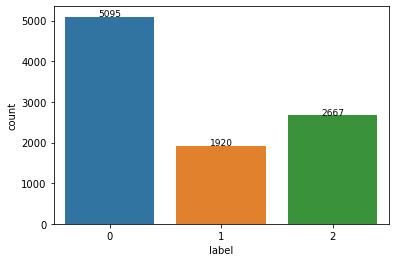

In [6]:
import seaborn
import matplotlib.pyplot as plt
cl_ax = seaborn.countplot(df['label'])
for p in cl_ax.patches:
    height = p.get_height()
    cl_ax.text(p.get_x() + p.get_width() / 2., height + 3, height, ha = 'center', size = 9)
plt.show()